In [45]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

repo_id = "huyhuung/irit_kohya_lora1"

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights(repo_id, sub_folder="weight")
_ = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

last.safetensors:   0%|          | 0.00/341M [00:00<?, ?B/s]

  0%|          | 0/30 [00:00<?, ?it/s]

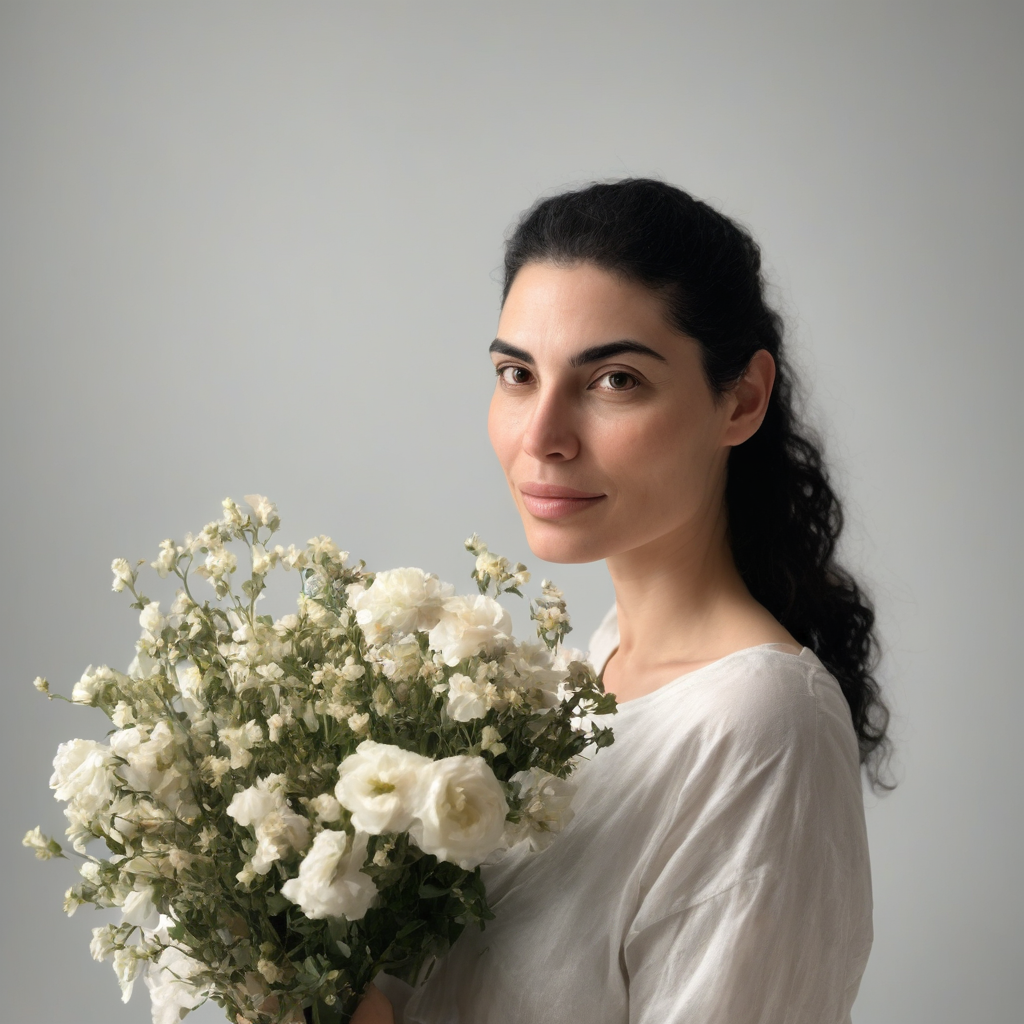

In [75]:
pos = "a professional photo portrait of Irit holding flowers, model photoshoot, professional photo, white background, Amazing Details, Best Quality, Masterpiece, dramatic lighting highly detailed, analog photo, overglaze, 80mm Sigma f/1.4 or any ZEISS lens."
image = pipe(prompt=pos, num_inference_steps=30, guidance_scale=7.5).images[0]
image

In [76]:
image.save("/kaggle/working/irit_kohya_Lora5.png", format="PNG")